# 00_0_Open_Exploration_Scenarios

**File Description**
This file conducts open exploration across scenarios given a policy where no levers are applied.

**Set up run parameters, import key packages, define model**

In [1]:
pf_id = 2 #problem formulation id
n_scenarios = pow(2, 1) #= 1024

In [2]:
import pandas as pd

In [3]:
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.points import Policy

ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(pf_id)

def get_do_nothing_policies(l_bol = 0, policy_id = 0):
    return [Policy('policy %s'%policy_id, **{l.name:l_bol for l in dike_model.levers})]

policies = get_do_nothing_policies()

C:\Users\Alienware\OneDrive - Maastricht University\Documents\GitHub\EMA-Thesis\final assignment\funs_generate_network.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return dict((str(k), v.dropna().to_dict())


In [4]:
import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

**Define a policy with all levers set to 0**

In [5]:
from ema_workbench import Policy
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]

**Run the model across random scenarios**

In [6]:
from ema_workbench import (ema_logging, MultiprocessingEvaluator, Samplers)
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies, uncertainty_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 160 scenarios * 1 policies * 1 model(s) = 160 experiments
100%|████████████████████████████████████████| 160/160 [05:36<00:00,  2.10s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
experiments, outcomes = results

**Save results**

In [8]:
from ema_workbench import save_results

save_results(results, './output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)

[MainProcess/INFO] results saved successfully to C:\Users\Alienware\OneDrive - Maastricht University\Documents\GitHub\EMA-Thesis\final assignment\output\open_exploration\Open_Exploration_id_2.tar.gz


In [9]:
experiments.to_csv('./output/open_exploration/Open_Exploration_id_%s_exp.csv'%pf_id, index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/open_exploration/Open_Exploration_id_%s_out.csv'%pf_id, index=False)

**Import key packages**

In [10]:
from ema_workbench.analysis import prim, dimensional_stacking, feature_scoring
from ema_workbench import load_results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load in results**

In [11]:
try:
    results = load_results('./output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)
except NameError as e:
    if (str(e) == "name 'pf_id' is not defined"):
        pf_id = 2
        print(e)
        print("defaulting to pf_id = %s"%pf_id)
        results = load_results('./output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)
    else:
        raise(e)
experiments, outcomes = results

[MainProcess/INFO] results loaded successfully from C:\Users\Alienware\OneDrive - Maastricht University\Documents\GitHub\EMA-Thesis\final assignment\output\open_exploration\Open_Exploration_id_2.tar.gz


**As a failsafe, drop NaN outcomes**

In [12]:
outcomes_pd = pd.DataFrame.from_dict(outcomes)
outcomes_pd.dropna(inplace=True)

In [13]:
outcomes_nonan = outcomes_pd.to_dict('list')

for outcome in outcomes_nonan.keys():
    outcomes_nonan[outcome] = np.array(outcomes_nonan[outcome])

outcomes = outcomes_nonan

In [14]:
experiments.drop(list(set(experiments.index) - set(outcomes_pd.index)), inplace=True)

**Subspace Partitioning: PRIM**
***Expected Annual Damage***

In [15]:
x = experiments
data = outcomes["Expected Annual Damage"]
y = data < np.percentile(data, 10) #filter results


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 160 points remaining, containing 15 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.08125, coverage: 0.8666666666666667, density: 1.0 restricted_dimensions: 7


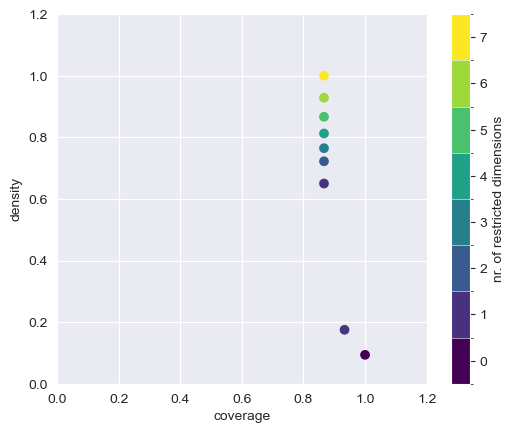

In [16]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

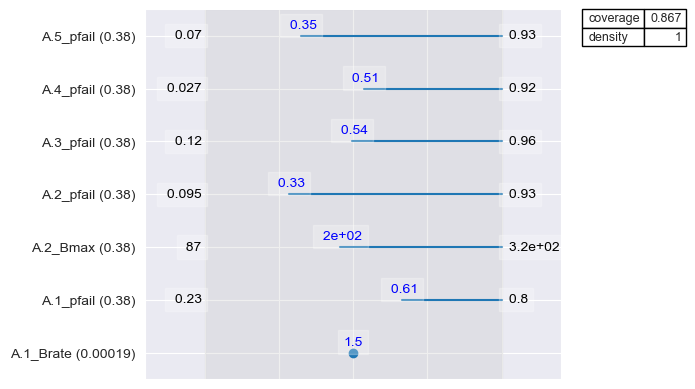

In [17]:
box1.inspect(style='graph')
plt.show()

**Subspace Partitioning: Dimensional Stacking**
***Expected Annual Damage***

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


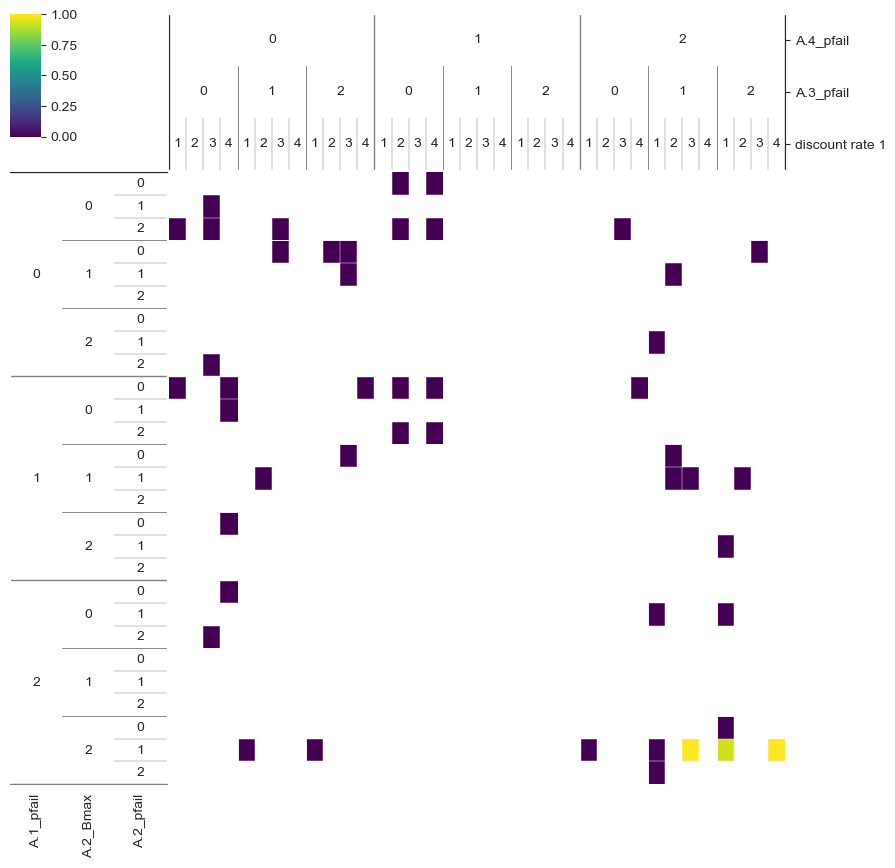

In [18]:
dimensional_stacking.create_pivot_plot(x, y)
plt.show()

**Subspace Partitioning: PRIM**
***Expected Number of Deaths***

In [19]:
x = experiments
data = outcomes["Expected Number of Deaths"]
y = data < np.percentile(data, 10) #np.quantile(data, .5) # 10 percent of worst outcomes

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 160 points remaining, containing 15 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0875, coverage: 0.9333333333333333, density: 1.0 restricted_dimensions: 6


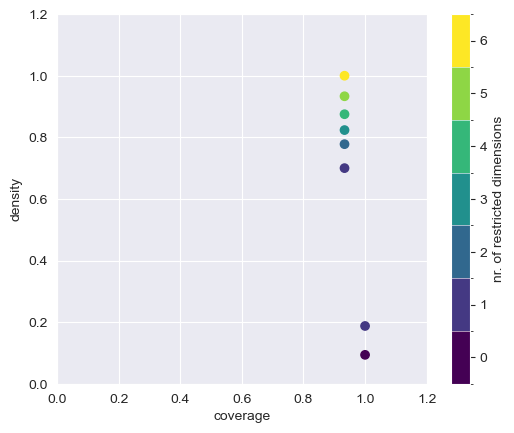

In [20]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

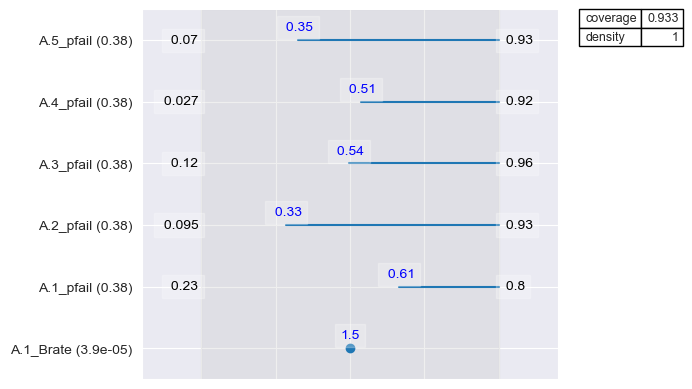

In [21]:
box1.inspect(style='graph')
plt.show()

**Subspace Partitioning: Dimensional Stacking**
***Expected Number of Deaths***

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


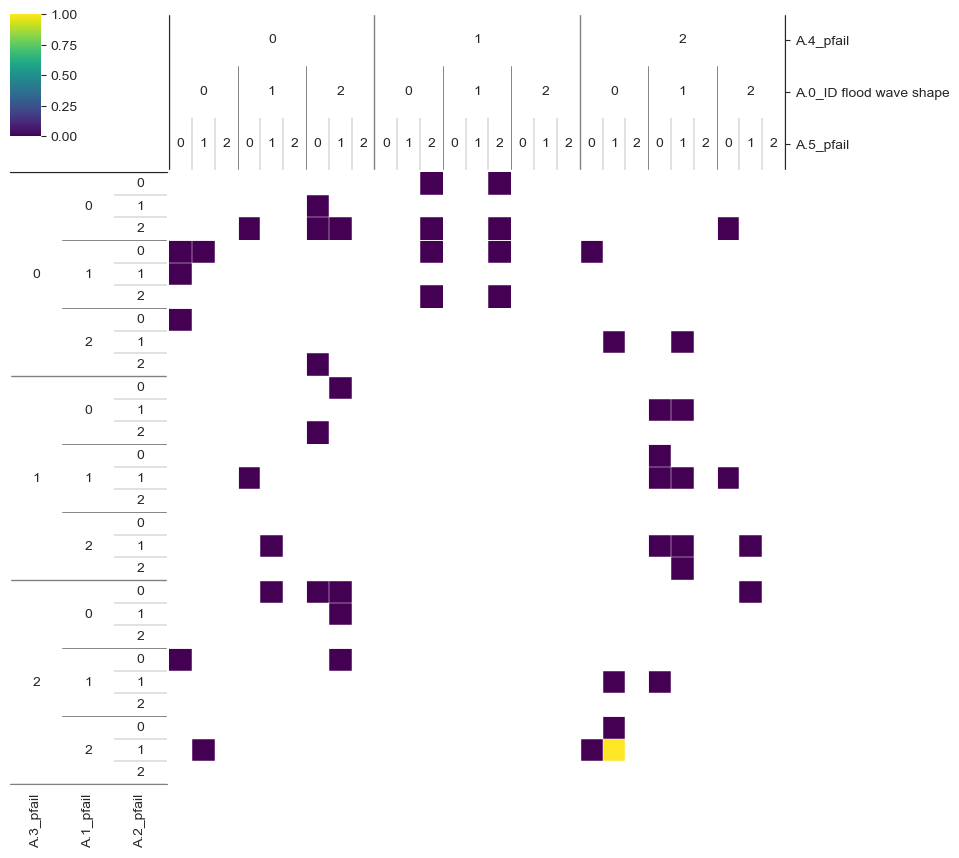

In [22]:
dimensional_stacking.create_pivot_plot(x, y) # 2, nbins=3
plt.show()

**Sensitivity Analysis: Feature Scoring**

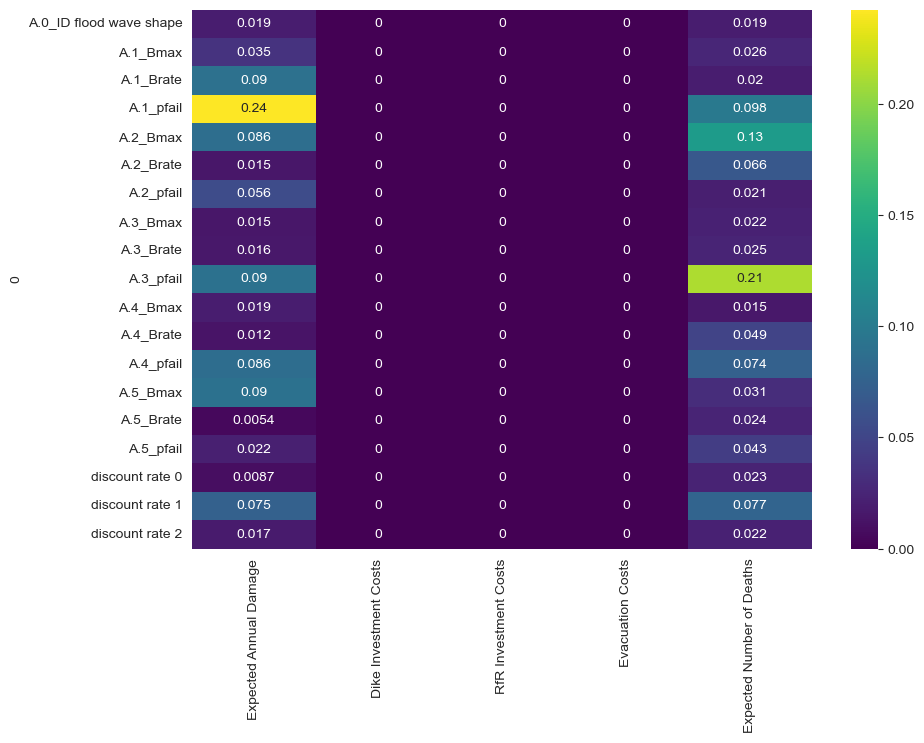

In [23]:
x = experiments.loc[:,['A.0_ID flood wave shape', 'A.1_pfail', 'A.2_pfail', 'A.3_pfail', 'A.4_pfail', 'A.5_pfail', 'A.1_Bmax', 'A.2_Bmax', 'A.3_Bmax', 'A.4_Bmax', 'A.5_Bmax',  'A.1_Brate', 'A.2_Brate', 'A.3_Brate', 'A.4_Brate', 'A.5_Brate', 'discount rate 0', 'discount rate 1', 'discount rate 2']]
y = outcomes

plt.figure(figsize = (10,7))

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True, )

plt.show()